The objective of this project is to build a salary prediction dashboard for HRs.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('HRDataset_v14.csv')

In [ ]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


## Basic information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [ ]:
df['Position'].unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [ ]:
df.shape

(311, 36)

In [ ]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [ ]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

# Data cleaning

In [ ]:
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
import datetime

In [ ]:
year=['DOB','DateofHire','LastPerformanceReview_Date','DateofTermination']
for i in year:
    df[i]=pd.to_datetime(df[i])
    df[i]=pd.DatetimeIndex(df[i]).year

df['DateofTermination'].fillna(2022, inplace = True)

In [ ]:
df[['DOB']].head(10)

,DOB
0,1983
1,1975
2,1988
3,1988
4,1989
5,1977
6,1979
7,1983
8,2070
9,1988


In [ ]:
for i in df:
    print('Unique value of ' + i,len(df[i].unique()))

Unique value of Employee_Name 311
Unique value of EmpID 311
Unique value of MarriedID 2
Unique value of MaritalStatusID 5
Unique value of GenderID 2
Unique value of EmpStatusID 5
Unique value of DeptID 6
Unique value of PerfScoreID 4
Unique value of FromDiversityJobFairID 2
Unique value of Salary 308
Unique value of Termd 2
Unique value of PositionID 30
Unique value of Position 32
Unique value of State 28
Unique value of Zip 158
Unique value of DOB 307
Unique value of Sex 2
Unique value of MaritalDesc 5
Unique value of CitizenDesc 3
Unique value of HispanicLatino 4
Unique value of RaceDesc 6
Unique value of DateofHire 101
Unique value of DateofTermination 97
Unique value of TermReason 18
Unique value of EmploymentStatus 3
Unique value of Department 6
Unique value of ManagerName 21
Unique value of ManagerID 24
Unique value of RecruitmentSource 9
Unique value of PerformanceScore 4
Unique value of EngagementSurvey 119
Unique value of EmpSatisfaction 5
Unique value of SpecialProjectsCount 

In [ ]:
means = df.groupby('Position')['Salary'].mean()
means 

Position
Accountant I                     63507.666667
Administrative Assistant         52280.000000
Area Sales Manager               64932.555556
BI Developer                     95465.000000
BI Director                     110929.000000
CIO                             220450.000000
Data Analyst                     89932.571429
Data Analyst                     88527.000000
Data Architect                  150290.000000
Database Administrator          108499.600000
Director of Operations          170500.000000
Director of Sales               180000.000000
Enterprise Architect            103613.000000
IT Director                     178000.000000
IT Manager - DB                 144959.500000
IT Manager - Infra              157000.000000
IT Manager - Support            138888.000000
IT Support                       63684.375000
Network Engineer                 61605.000000
President & CEO                 250000.000000
Principal Data Architect        120000.000000
Production Manager       

In [ ]:
def fix_time(f):
    if f>2020:
        f=f-100
    else:
        f=f
    return f


df['DOB']= df['DOB'].apply(fix_time).astype('int')    

Feature engineering

In [ ]:
df['Age']= (2022-df.DOB).astype('int')

df['Experience']=(df['DateofTermination']-df['DateofHire']).astype('int')

for i in range(len(df['DateofTermination'])):
    if i<2022:
        df['carrierbreak']=2022-df['DateofTermination']
    else:
        df['carrierbreak']=0  

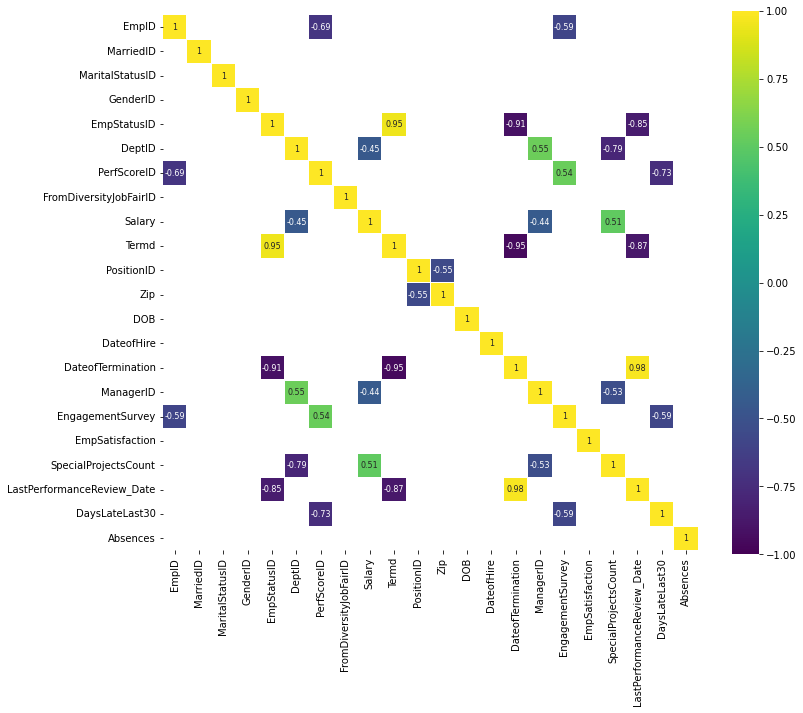

In [ ]:
corr = df.corr() # We already examined SalePrice correlations
# .drop('Salary', axis=1)
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [ ]:
table = pd.pivot_table(df, values='EmpID', index=['DeptID','Department'],aggfunc=lambda x: len(x.unique()))
table.rename({"EmpID":"Count of Employees"},axis=1,inplace=True)
table

Count of Employees
DeptID Department                              
1      Admin Offices                          9
       Software Engineering                   1
2      Executive Office                       1
3      IT/IS                                 50
4      Software Engineering                  10
5      Production                           208
6      Production                             1
       Sales                                 31

In [ ]:
# df1=df[['DeptID','PositionID','RaceDesc','SpecialProjectsCount','Age','PerfScoreID','Experience','Salary','carrierbreak']]

In [ ]:
df1=df[['Department','Position','RaceDesc','SpecialProjectsCount','Age','PerfScoreID','Experience','Salary','carrierbreak']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['RaceDesc']=le.fit_transform(df1['RaceDesc'])
df1['Department']=le.fit_transform(df1['Department'])
df1['Position']=le.fit_transform(df1['Position'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1.to_csv('submission.csv',index=False)

#model

In [ ]:
x= df1.drop(['Salary'],axis=1)
y =df1['Salary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_=MinMaxScaler()
X=min_.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_re = LinearRegression()
lin_re.fit(X_train,y_train)
y1_pred = lin_re.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('r^2 value of the linear model:',r2_score(y_test,y1_pred))

r^2 value of the linear model: 0.44198824105022605


In [ ]:
diffence= y1_pred-y_test
diffence=pd.DataFrame(diffence)
diffence

,Salary
290,-22148.840542
9,36438.414258
57,4819.854437
60,-11960.908323
25,-6256.693543
...,...
250,4801.082123
19,12309.021926
146,-429.813158
79,2301.951589


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

print(cross_val_score(GradientBoostingRegressor(), x, y, cv=cv))
print(cross_val_score(GradientBoostingRegressor(), x, y, cv=cv).mean())

[0.68839509 0.72896334 0.318419   0.65020148 0.74874406]
0.635278357510836


In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print('r^2 value of the Gredient booster model:',r2_score(y_test,y_pred))

r^2 value of the Gredient booster model: 0.6868020593832953


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg

def find_best_model_using_gridsearchcv(X_train,y_train):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },

        'Gredient_booster':{
            'model':GradientBoostingRegressor(),
            'params':{ 
                      'max_features': ['auto','sqrt','log2'],
                      'n_estimators': [1,5,10,50,100]
                
            }
        },
        'Xgbooster':{
            'model':xg.XGBRegressor(),
            'params':{
                'max_features': ['auto','sqrt','log2'],
                 'n_estimators': [1,5,10,50,100]
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        # gs.fit(X,y)
        
        gs.fit(X_train,y_train)
        y_pred=gs.predict(X_test)
        r2=r2_score(y_test,y_pred)

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'r2_score': r2
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

[06:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,model,best_score,best_params
0,linear_regression,0.280096,{'normalize': True}
1,lasso,0.280144,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.341760,"{'criterion': 'mse', 'splitter': 'best'}"
3,Gredient_booster,0.627380,"{'max_features': 'auto', 'n_estimators': 50}"
4,Xgbooster,0.682142,"{'max_features': 'auto', 'n_estimators': 100}"


In [ ]:
best_score = 0.0
best_params = {'max_depth': None, 'max_features': 'auto','n_estimators': 10}
for max_depth in [None, 2,3,5]:
    for max_features in ['auto','sqrt', 'log2']:
        for n_estimators in [10,100,200]:
            score = cross_val_score(GradientBoostingRegressor(n_estimators=n_estimators,
                                                          max_features=max_features,
                                                          max_depth=max_depth,
                                                          random_state=43
                                                          ),
                                    X_train,
                                    y_train,
                                    ).mean()
            if score > best_score:
                best_score= score
                best_params['max_depth'],best_params['max_features'], best_params['n_estimators'] = max_depth, max_features, n_estimators

            print('max_depth : %s, max_features : %s, n_estimators : %s , Average R^2 Score : %.4f'%(str(max_depth), max_features, str(n_estimators), score))

print('\nBest Score : %.4f, Best Params : %s'%(best_score, str(best_params)))

max_depth : None, max_features : auto, n_estimators : 10 , Average R^2 Score : 0.2699
max_depth : None, max_features : auto, n_estimators : 100 , Average R^2 Score : -0.0195
max_depth : None, max_features : auto, n_estimators : 200 , Average R^2 Score : -0.0195
max_depth : None, max_features : sqrt, n_estimators : 10 , Average R^2 Score : 0.2953
max_depth : None, max_features : sqrt, n_estimators : 100 , Average R^2 Score : 0.3139
max_depth : None, max_features : sqrt, n_estimators : 200 , Average R^2 Score : 0.3139
max_depth : None, max_features : log2, n_estimators : 10 , Average R^2 Score : 0.3414
max_depth : None, max_features : log2, n_estimators : 100 , Average R^2 Score : 0.4009
max_depth : None, max_features : log2, n_estimators : 200 , Average R^2 Score : 0.4009
max_depth : 2, max_features : auto, n_estimators : 10 , Average R^2 Score : 0.1811
max_depth : 2, max_features : auto, n_estimators : 100 , Average R^2 Score : 0.5037
max_depth : 2, max_features : auto, n_estimators : 

#Model

In [ ]:

lin_re = LinearRegression()
regr_trans = TransformedTargetRegressor(regressor=lin_re, transformer=MinMaxScaler())
regr_trans.fit(X_train,y_train)
Y1_pred = regr_trans.predict(X_test)

print('r^2 value of the linear model:',r2_score(y_test,Y1_pred))

r^2 value of the linear model: 0.44198824105022627


In [ ]:


# print('r^2 value of the xgboost model:',r2_score(y_test,Y4_pred))
# print('r^2 value of the Random forest after finetunning model:',r2_score(y_test,Y6_pred))
# print('r^2 value of the Gredient boosting after finetunning model:',r2_score(y_test,Y7_pred))
# print('r^2 value of the Xg boosting after finetunning model:',r2_score(y_test,Y8_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rand_re = RandomForestRegressor()
regr_trans = TransformedTargetRegressor(regressor=rand_re, transformer=MinMaxScaler())
regr_trans.fit(X_train,y_train)
Y2_pred = regr_trans.predict(X_test)
print('r^2 value of the Random forest model:',r2_score(y_test,Y2_pred))

r^2 value of the Random forest model: 0.7234757906382199


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_re = GradientBoostingRegressor()
regr_trans = TransformedTargetRegressor(regressor=gbr_re, transformer=MinMaxScaler())
gbr_re.fit(X_train,y_train)
Y3_pred = gbr_re.predict(X_test)
print('r^2 value of the Gradient booster model:',r2_score(y_test,Y3_pred))

r^2 value of the Gradient booster model: 0.6889729129479285


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# gbr_re = GradientBoostingRegressor()
# regr_trans = TransformedTargetRegressor(regressor=gbr_re, transformer=MinMaxScaler())
# regr_trans.fit(X_train,y_train)
# Y3_pred = regr_trans.predict(X_test)
# print('r^2 value of the Gradient booster model:', r2_score(y_test,Y3_pred))

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print('r^2 value of the Gredient booster model:',r2_score(y_test,y_pred))

r^2 value of the Gredient booster model: 0.689324797572205


In [ ]:
# reg1 = GradientBoostingRegressor(random_state=42)
# reg2 = RandomForestRegressor(random_state=42)
# reg3 = LinearRegression()

# vreg = VotingRegressor(estimators=[
#     ('gb', reg1),
#     ('rf', reg2),
#     ('lr', reg3)
# ])

# vreg = vreg.fit(X_train, y_train)
# y2_pred = vreg.predict(X_test)
# print('r^2 value of the VotingRegressor:',r2_score(y_test,y2_pred))

In [ ]:
import xgboost as xg
xgb_re =xg.XGBRegressor()
regr_trans = TransformedTargetRegressor(regressor=xgb_re, transformer=MinMaxScaler())
regr_trans.fit(X_train,y_train)
Y4_pred = regr_trans.predict(X_test)

[06:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:


estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('lr', LinearRegression()),
    ('ridge', RidgeCV()), 
    ('lasso', LassoCV(random_state=42)), 
    ('svr', SVR())
]

# reg = TransformedTargetRegressor(regressor=estimators, transformer=MinMaxScaler())
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42))
reg = reg.fit(X_train, y_train)

y2_pred = reg.predict(X_test)
print('r^2 value of the Stacked regressor model:',r2_score(y_test,y2_pred))

r^2 value of the Stacked regressor model: 0.6623562786337145


Fine tuning

In [ ]:
estimators = [
    ('rf', RandomForestRegressor(random_state=42, max_depth= 7, n_estimators= 80)),
    ('gb', GradientBoostingRegressor(random_state=42,max_depth= 7, n_estimators= 51)),
    ('lr', LinearRegression()),
    ('xg', xg.XGBRegressor()),        
]

reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42,max_depth= 7, n_estimators= 51))
reg = reg.fit(X_train, y_train)

y2_pred = reg.predict(X_test)
print('r^2 value of the Stacked regressor model:',r2_score(y_test,y2_pred))

[06:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 value of the Stacked regressor model: 0.6554141818956791


In [ ]:
x

,DeptID,PositionID,RaceDesc,SpecialProjectsCount,Age,PerfScoreID,Experience,carrierbreak
0,5,19,5,0,39,4,11,0.0
1,3,27,5,6,47,3,1,6.0
2,5,20,5,0,34,3,1,10.0
3,5,19,5,0,34,3,14,0.0
4,5,19,5,0,33,3,5,6.0
...,...,...,...,...,...,...,...,...
306,5,20,5,0,37,3,8,0.0
307,5,19,1,0,40,1,7,7.0
308,3,6,5,6,43,4,12,0.0
309,3,9,5,5,43,3,7,0.0


In [ ]:
# reg.predict([5,19,5,0,39,4,11,0])

graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


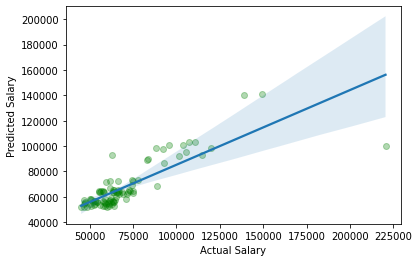

In [ ]:
sns.regplot(y_test,y2_pred, scatter_kws={'alpha':0.3, 'color':'g'})
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()